1687944235.933186
1687944235.933633
1687944235.933847
AAA -9.995319375157158e-11
AAA -9.959570610858936e-11
AAA -9.88208711914137e-11
AAA -9.971881524970167e-11
AAA -9.990211344463094e-11
AAA -9.959378910889269e-11
AAA -9.864517736948779e-11
AAA -9.935853592010199e-11
AAA -9.916394217045066e-11
AAA -9.967905381439266e-11
AAA -9.903103815493022e-11
AAA -9.909187768093785e-11
AAA -9.858777590916226e-11
AAA -9.986717605074304e-11
AAA 9.8864146036437e-11
AAA 9.982997067892185e-11
AAA 9.973182002465109e-11
AAA 9.913232040803521e-11
AAA 9.827123836902985e-11
AAA 9.920074484082164e-11
AAA 9.983774224009423e-11
AAA 9.809377615743742e-11
AAA 9.817836821301995e-11
AAA 9.864434269424294e-11
AAA 9.972162678950625e-11
AAA 9.911590298505857e-11
AAA 9.935114536618883e-11
AAA 9.836263747953211e-11
AAA -9.985139719655488e-11
AAA -9.99873662473428e-11
AAA -9.994688610424965e-11
AAA -9.961518624240012e-11
AAA -9.977835505021612e-11
AAA -9.984034209057555e-11
AAA -9.949220703613324e-11
AAA -9.970958364887

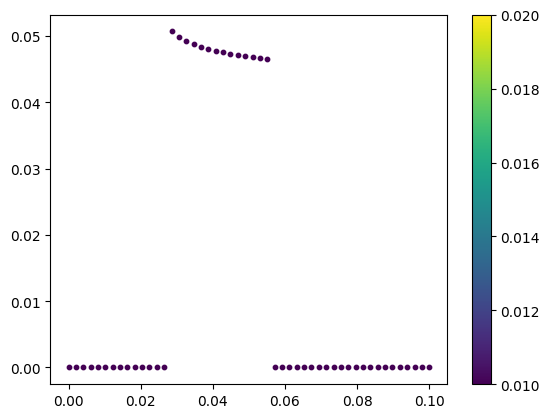

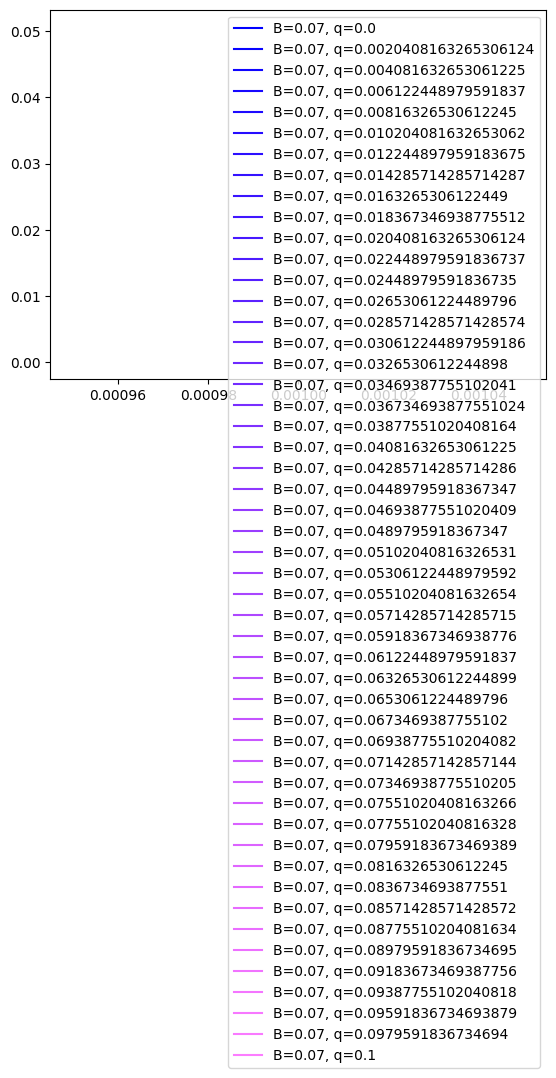

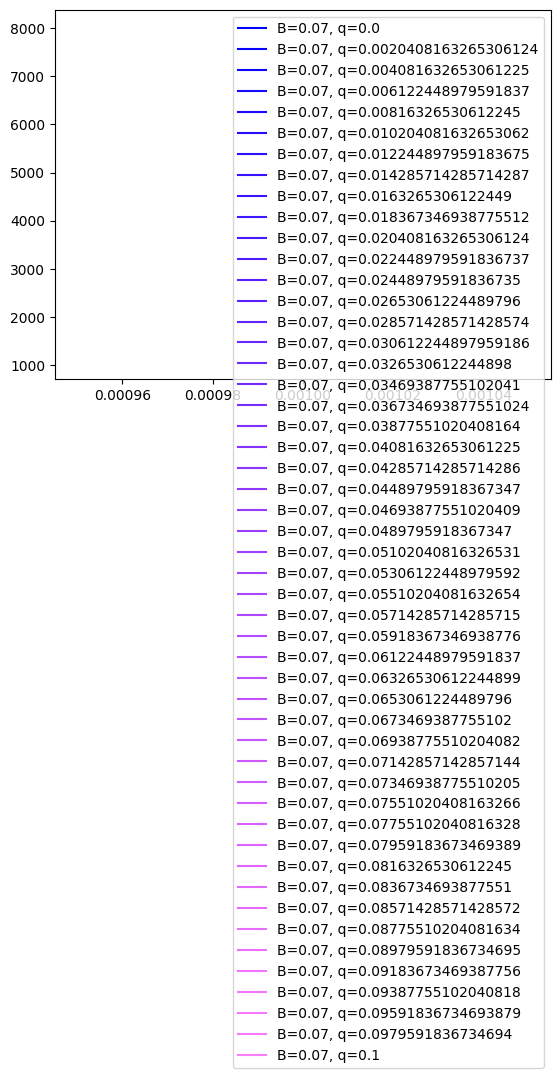

1687944324.1182652
6.828777068836998e-10
6.80354975273737e-10
6.749111565574531e-10
6.81013700248358e-10
6.825277461618005e-10
6.810443380675562e-10
6.754634710294807e-10
6.812910962817932e-10
6.804466528563924e-10
6.834529350864248e-10
6.77290178124818e-10
6.754673163668085e-10
6.706409019125892e-10
6.807347138835948e-10
0.05070235657969947
0.049902912007731844
0.049296385918471776
0.04881413616902087
0.048418990471146554
0.048088934652019924
0.04780797841672005
0.04756232344512804
0.04735400090256536
0.04716954203361496
0.046997778782881236
0.046844387291100714
0.04671414756593352
0.04659992509865699
5.273574204511857e-09
4.40443415421179e-09
2.7786093013412547e-09
2.260134599491469e-09
2.2850280847509868e-09
1.7303694252003364e-09
1.475569281477629e-09
1.579975496038451e-09
1.4940885035133e-09
1.2075106789748685e-09
1.078266570794704e-09
1.121977489977792e-09
1.1397400795913113e-09
1.0328213030797437e-09
8.787299832819479e-10
7.787701475591463e-10
7.231794105691324e-10
7.18513663274

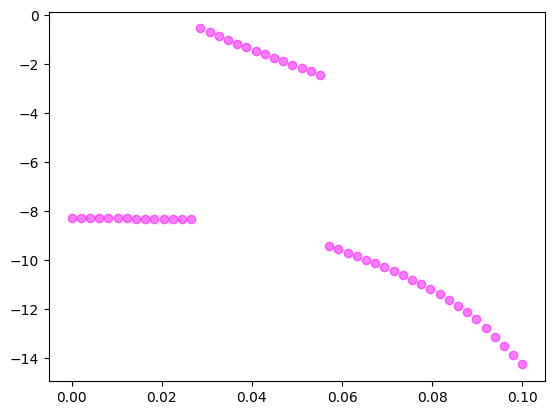

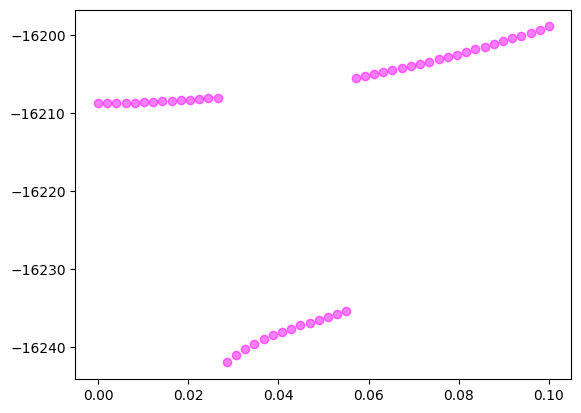

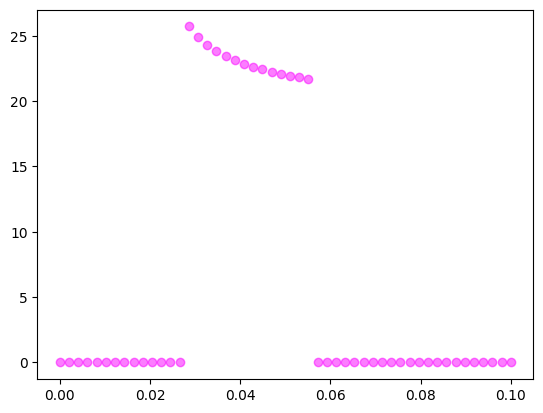

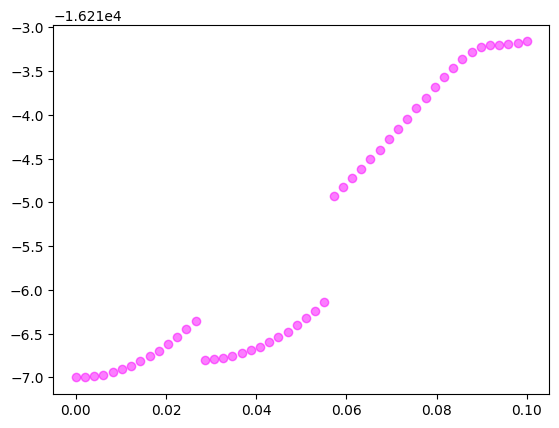

In [6]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from time import time
#from scipy.integrate import quad

print(time())

## gap_eq をdef

def e_k_spin(k1, k2, q, y, B): 
    return 2*t*(np.cos(a*(k1+q/2))+np.cos(a*(k2))) - u + y * 1/2 * gu * B

def e_k_s(k1, k2, q, B):
    return (e_k_spin(k1, k2, q, 1, B) + e_k_spin(-1*k1, k2, q, -1, B))/2

def e_k_a(k1, k2, q, B):
    return (e_k_spin(k1, k2, q, 1, B) - e_k_spin(-1*k1, k2, q, -1, B))/2

def E_k_q(k1, k2, gap, q, B):
    return np.sqrt(e_k_s(k1, k2, q, B)**2 + gap**2)

def E_k_q_s(k1, k2, gap, q, y, B):
    return E_k_q(k1, k2, gap, q, B) + y * e_k_a(k1, k2, q, B)

def Fermi(beta, E):
   #return 1 / (np.exp(beta*E) + 1 )
   return 0.5*(1-tanh(0.5*beta*E))

def func(k1, k2, gap, q, B): 
    return gap*(1-Fermi(beta, E_k_q_s(k1, k2, gap, q, -1, B))-Fermi(beta, E_k_q_s(k1, k2, gap, q, 1, B)))/(2*E_k_q(k1, k2, gap, q, B))

#
#def rhs(gap, q, B):              #vn0 = (v / n^2) * n0
#    sum = 0
#    for n1 in range(N):
#        k1 = -1 * np.pi/a + 2 * n1 * np.pi / (a * N)
#        for n2 in range(N):
#            k2 = -1 * np.pi/a + 2 * n2 * np.pi / (a * N)
#            sum = sum + func(k1, k2, gap, q, B)
#    return (V / (N**2)) * sum
###################################

#def rhs(gap, q, B):
#    k1 = arange(N)/N
#    kx, ky = meshgrid(k1, k1, indexing='ij')
#    f = func(kx, ky, gap, q, B)
#    return (V / (N**2)) * sum(f)

def rhs(gap, q, B):
    k1 = -1 * np.pi/a + 2 * arange(N) * np.pi / (a * N)
    kx, ky = meshgrid(k1, k1, indexing='ij')
    f = func(kx, ky, gap, q, B)
    return (V / (N**2)) * sum(f)

print(time())

##パラメータの調整
N, V, t, a, u, gu, n0, n1, n2 =100, 1, 1, 1, 0, 1, 50, 1, 1    # 7.525 #9.21
qs   = np.linspace(0,0.1,n0)  #(np.pi/a)
Bs   = np.linspace(0.07,0.1,n1)     #np.linspace(0,0.08,n1)
kBTs = np.linspace(1e-3,0.02,n2)

print(time())

##ギャップの逐次計算
ans = []
for h in range(n0):
    ans0 = []
    for i in range(n1):
        ans1 = []
        for j in range(n2): # それぞれの温度で秩序パラメータを計算
            beta, d0, dd = 1/kBTs[j], 0.01, 0.0
            for k in range(10000): # 収束するまで最大1000回ループ
                d1 = rhs(d0, qs[h], Bs[i]) 
                dd = d1-d0
                if abs(d1-d0) < 1e-10: break # 収束チェック
                d0 = d1*0.1 + 0.9*d0
            ans1.append([d0, abs(dd), k])
            print("AAA",dd)
        ans0.append(ans1)
    ans.append(ans0)
ans = np.array(ans)

print(time())


##gapのq依存
for j in range(n2):    ##q,gap図
    for i in range(n1):
        ans_q = []
        for h in range(n0):
            ans_q.append(ans[h][i][j][0])
            figure = plt.scatter(qs[h], ans[h][i][j][0], 10, c=kBTs[j],  cmap='viridis' ,vmin=0.01, vmax=0.02)
c= plt.colorbar()
plt.savefig("FFLO_q-gap(N=100,B=0.07).png")
plt.show()



##gapの温度依存
for h in range(n0):    ##kBT,gap
    for i in range(n1):
        plt.plot(kBTs, ans[h][i][:,0], label = 'B='+str(Bs[i])+', q='+str(qs[h]) , color=(h/n0,i/n1,1-i/n1,1-(h/n0)/2)) # 秩序パラメータの温度依存性をプロット
        #plt.plot(kBTs, ans[h][i][:,0], color=(h/n0,i/n1,1-i/n1,1-(h/n0)/2)) # 秩序パラメータの温度依存性をプロッ
#plt.legend(bbox_to_anchor=(1, 1), bbox_inches='tight', loc='upper left', borderaxespad=0, fontsize=12)
    #plt.savefig("gap(q="+str(np.floor(qs[h]))+").png")
plt.legend()
plt.show()


##反復回数の温度依存
for h in range(n0):    ##kBT,反復回数　図
    for i in range(n1):
        plt.plot(kBTs, ans[h][i][:,2],label = 'B='+str(Bs[i])+', q='+str(qs[h]) , color=(h/n0,i/n1,1-i/n1,1-(h/n0)/2)) # 収束に必要だった反復回数のプロット
#plt.legend(bbox_to_anchor=(1, 1), bbox_inches='tight', loc='upper left', borderaxespad=0, fontsize=12)
plt.legend()
plt.show()

print(time())

def rhs(gap, q, B):
    k1 = -1 * np.pi/a + 2 * arange(N) * np.pi / (a * N)
    kx, ky = meshgrid(k1, k1, indexing='ij')
    f = func(kx, ky, gap, q, B)
    return (V / (N**2)) * sum(f)


#free energy の定義

def F1(h):
    sum = 0
    for n1 in range(N):
        k1 = -1 * np.pi/a + 2 * n1 * np.pi / (a * N)
        for n2 in range(N):
            k2 = -1 * np.pi/a + 2 * n2 * np.pi / (a * N)
            for y in range(-1,1):
                sum = sum + np.log(1+np.exp(-1*beta*E_k_q_s(k1, k2, ans_q[h], qs[h], y, B)))
    return -1*1/beta*sum

def F0(h):
    sum = 0
    for n1 in range(N):
        k1 = -1 * np.pi/a + 2 * n1 * np.pi / (a * N)
        for n2 in range(N):
            k2 = -1 * np.pi/a + 2 * n2 * np.pi / (a * N)
            sum = sum + e_k_spin(-1*k1, -1*k2, qs[h], -1, B) - E_k_q_s(k1, k2, ans_q[h], qs[h], -1, B)
    return sum

def Fc(h):
    return(N**2)*(ans_q[h]**2)/V

def free_energy(h):              #vn0 = (v / n^2) * n0
    return F1(h) + F0(h) + Fc(h)

for h in range(n0):
    print(ans_q[h])

#free energy の計算
kBT = kBTs[0]
beta = 1/kBT
B = Bs[0]
ans_F0 = []
for h in range(n0):
    ans = F0(h)
    ans_F0.append(ans)
ans0 = np.array(ans_F0)

ans_F1 = []
for h in range(n0):
    ans = F1(h)
    ans_F1.append(ans)
ans1 = np.array(ans_F1)

ans_FC = []
for h in range(n0):
    ans = Fc(h)
    ans_FC.append(ans)
ansC = np.array(ans_FC)

ans_F = []
for h in range(n0):
    ans = free_energy(h)
    ans_F.append(ans)
ans = np.array(ans_F)

#free energy の描画

plt.scatter(qs, ans1, color=(h/n0,i/n1,1-i/n1,1-(h/n0)/2))
plt.show()

plt.scatter(qs, ans0, color=(h/n0,i/n1,1-i/n1,1-(h/n0)/2))
plt.show()

plt.scatter(qs, ansC, color=(h/n0,i/n1,1-i/n1,1-(h/n0)/2))
plt.show()

plt.scatter(qs, ans, color=(h/n0,i/n1,1-i/n1,1-(h/n0)/2))
plt.show()